# Part II - Exploration slide deck
## by Lawal Salim

## Investigation Overview

> The overall goal of the presentation is to point out by visualization which of the variables of the dataset affects the trip duration, the major variables to take a look at include; the user age, gender, start station, end station and the user type. The first part of the investigation has been done and exploratory analysis was done using libraries such as pandas, numpy, seaborn and matplotlib. 
This is the second part of the project which presents the major findings of the first project


## Dataset Overview

> The properties of the dataset and the following columns:
* Trip Duration (seconds), Start Time and Date, End Time and Date, Start Station ID, Start Station Name, Start Station Latitude,
  Start Station Longitude, End Station ID, End Station Name, End Station Latitude, Bike ID, User type, Member Birth Year, Member Gender and Bike Share Trip.


In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\Salim\\Desktop\\ALX-T\\fordgobike-tripdata.csv', parse_dates=['member_birth_year'])

In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaT,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes


In [18]:
#changing the start and endtime to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['member_birth_year'] = pd.to_datetime(df['member_birth_year'])

In [19]:
# Converting the seconds to hours.
df['duration_in_min'] = df['duration_sec'] / 60

In [20]:
# Convert given date to age
today = datetime.today()
df['member_birth_year'] = df['member_birth_year'].apply(lambda x: (today - x).days // 365)

### Average Trip by Bikes Users
From the total entry of 183412, more than 3/4 of the users are Subscribers which clearly shows the subscribers made use of the bikes more.

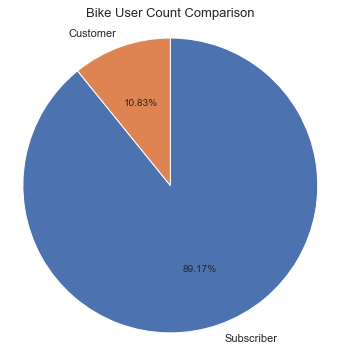

In [21]:
# User type by it's percentage

plt.figure(figsize=(9,6))
counts_sorted = df['user_type'].value_counts()
plt.pie(counts_sorted, labels = counts_sorted.index, startangle = 90,
        counterclock = False, autopct='%2.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=13);

### The relationship between the Number of Trips and duration
* The average number of trips per minute is between 5 and 15mins with the peak estimated to be around 13mins per trip

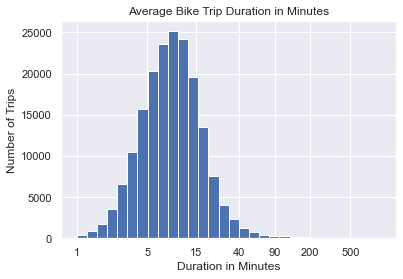

In [22]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 5, 15, 40, 90, 200, 500]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_in_min' , bins = bins);
plt.xscale('log');
plt.xlabel('Duration in Minutes');
plt.title('Average Bike Trip Duration in Minutes');
plt.ylabel('Number of Trips');plt.xticks(ticks,labels);

### Impact of gender type on the Duration of the Trip
It can be seen that the male riders have higher trips but the majority others and females have highest trip durations

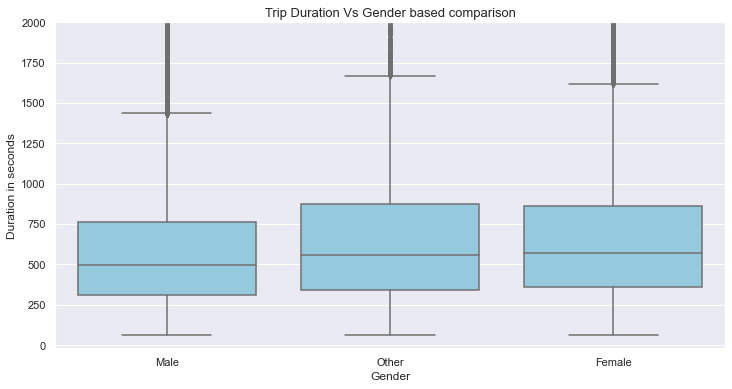

In [23]:
plt.figure(figsize = [12, 6])
vis_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = 'skyblue')
plt.ylim([-20, 2000])
sb.set(style = 'darkgrid')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Duration in seconds', fontsize=12);
plt.title('Trip Duration Vs Gender based comparison', fontsize=13);

### The impact of Age and member gender on the Duration of the Trip
* It can be seen from the scatterplot and heat map that the majority of users are between the age of 20-40 years old with high duartion of trips around the age of 30 years old.

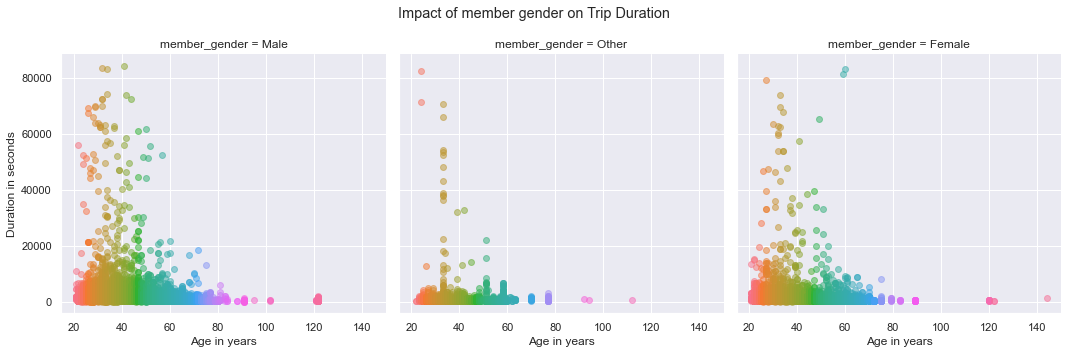

In [24]:
# Exploring the correlation between the gender and the age of the users
M_Gender = sb.FacetGrid(df, col="member_gender", hue='member_birth_year', col_wrap = 3, height = 5)
M_Gender.map(plt.scatter, 'member_birth_year', 'duration_sec', alpha=0.5)
M_Gender.fig.suptitle('Impact of member gender on Trip Duration')
M_Gender.set_xlabels('Age in years')
M_Gender.set_ylabels('Duration in seconds');
M_Gender.fig.subplots_adjust(top=0.85);

In [ ]:
plt.figure(figsize = (10,5))
sb.violinplot(data = df, x = 'member_gender', y = 'member_birth_year')
plt.title('Age and gender Relationship', fontsize=13)

### The impact of Age on the Duration of the Trip
* It can be seen from the scatterplot and heat map that the majority of users are between the age of 20-40 years old with high duartion of trips around the age of 30 years old.

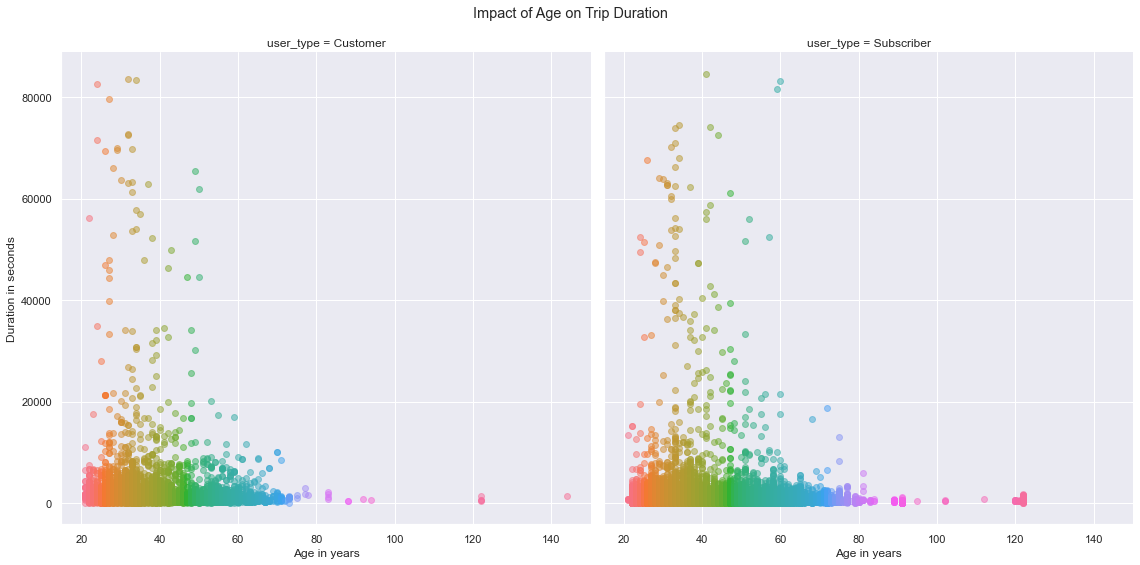

In [26]:
# Exploring the correlation between the user type and the age of the users
U_Type = sb.FacetGrid(df, col="user_type", hue='member_birth_year', col_wrap = 2, height = 8)
U_Type.map(plt.scatter, 'member_birth_year', "duration_sec", alpha=0.5)
U_Type.fig.suptitle('Impact of Age on Trip Duration')
U_Type.set_xlabels('Age in years')
U_Type.set_ylabels('Duration in seconds');
U_Type.fig.subplots_adjust(top=0.9);

### The impact of start station on the Duration of the Trip
* It can be seen that the Market St at 10th station has the highest number of start trips as compared to the others, which indicates that majority prefare to end their trip there

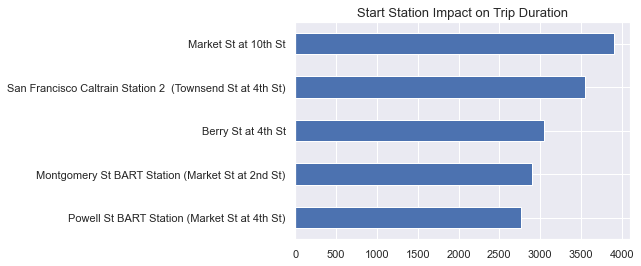

In [27]:
plt.title('Start Station Impact on Trip Duration', fontsize=13)
df.start_station_name.value_counts(ascending=True).tail(5).plot.barh();

### The impact of end station on the Duration of the Trip
> It can be seen that San Francisco Caltrain Station 2 has the highest number of end trips as compared to the others, which indicates that majority prefare to end their trip there

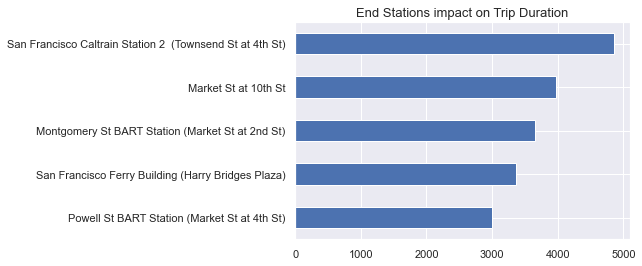

In [28]:
plt.title('End Stations impact on Trip Duration', fontsize=13)
df.end_station_name.value_counts(ascending=True).tail(5).plot.barh();

### Key Insights
* The user type has great impact on the trip duration
* The young people make use of the bikes more
* Subscribers tend to use the bikes more than the customers


In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert fordGoBike_2slide..ipynb --to slides --post serve --no-input --no-prompt